In [51]:
import numpy as np 
#import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
#from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import accuracy_score
from PIL import Image
import os

from sklearn.preprocessing import StandardScaler
from time import time
from sklearn.utils.fixes import loguniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

In [18]:
folder=""
imageType="" # jpg or jpgCrop
cropText=""  # Crop or NoCrop
modelName="" #Shorten the Name A bit


In [19]:
folderTrain= folder + 'Train' + imageType
X_train=[]
y_train=[]
imageSize=(224,224)
for i in os.listdir(folderTrain):
    X_train.append(np.array(Image.open(folderTrain+i).resize(imageSize)))
    y_train.append(i[:5])
X_train=np.array(X_train)[:,:,:,0].reshape(1008,224*224)
print(y_train[:3])

['FL_00', 'FL_00', 'FL_00']


In [20]:
X_train.shape


(1008, 50176)

In [21]:
X_train, X_val, y_train, y_val  = train_test_split(X_train,y_train,test_size = (208/1008),random_state=13,stratify=y_train)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [22]:
def plot_X(pixels):
    fig, axes = plt.subplots(5, 5, figsize=(6, 6))
    for i, ax in enumerate(axes.flat):
        ax.imshow(np.array(pixels)[i].reshape(64, 64), cmap="gray")
    plt.show()

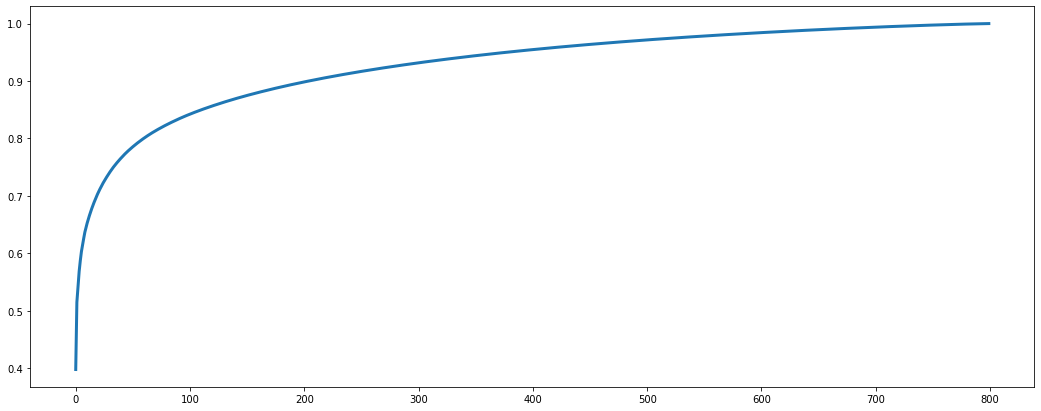

In [28]:
pca = PCA().fit(X_train)
plt.figure(figsize=(18, 7))
plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3)

In [29]:
print(len(np.where(pca.explained_variance_ratio_.cumsum() > 0.60)[0]))
print(np.where(pca.explained_variance_ratio_.cumsum() > 0.95))
print(np.where(pca.explained_variance_ratio_ > .06))

795
(array([377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389,
       390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402,
       403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415,
       416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428,
       429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441,
       442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454,
       455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467,
       468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480,
       481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493,
       494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506,
       507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519,
       520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532,
       533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545,
       546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 55

In [30]:
pca = PCA(n_components=370).fit(X_train)

In [31]:
target_names=['FL_00','FL_09','FL_18','FL_27','NF_00','NF_09','NF_18','NF_27']

In [35]:
def PCAEigen(min_components, max_components, step_value):
    best_fit = [0,0,0,0]
    for n_components in range(min_components, max_components,step_value):
    
        t0 = time()
        pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X_train)
    
        eigenfaces = pca.components_.reshape((n_components, 224, 224))

    
        t0 = time()
        X_train_pca = pca.transform(X_train)
        X_val_pca = pca.transform(X_val)
        t0 = time()
        param_grid = {
            "C": loguniform(1e3, 1e4, 1e5),
            "gamma": loguniform(1e-4, 1e-3, 1e-1),
            
            }
        clf = RandomizedSearchCV(
            SVC(kernel = "rbf", class_weight="balanced"), param_grid, n_iter=10
            )
        clf = clf.fit(X_train_pca, y_train)
        
        

       
        t0 = time()
        y_pred = clf.predict(X_val_pca)
        if best_fit[-1] <  accuracy_score(y_val, y_pred):
            best_fit=[n_components,clf.best_params_["C"],clf.best_params_["gamma"],accuracy_score(y_val, y_pred)]
        print(n_components, clf.best_estimator_,  accuracy_score(y_val, y_pred))
    return best_fit
        #print(n_components, accuracy_score(y_val, y_pred))
#ConfusionMatrixDisplay.from_estimator(
#    clf, X_val_pca, y_val, display_labels=target_names, xticks_rotation="vertical"
#)
#plt.tight_layout()
#plt.show()

In [44]:
PCAEigen(50,200,25)

50 SVC(C=102109.81540528264, class_weight='balanced', gamma=0.10058675974769693) 0.5576923076923077
75 SVC(C=109112.3549492333, class_weight='balanced', gamma=0.1002221940300234) 0.5048076923076923
100 SVC(C=101708.87774325634, class_weight='balanced', gamma=0.1005125738461669) 0.4951923076923077
125 SVC(C=102416.1545574036, class_weight='balanced', gamma=0.10051747526161275) 0.46634615384615385
150 SVC(C=103552.11080704496, class_weight='balanced', gamma=0.10024956376163298) 0.4326923076923077
175 SVC(C=104961.45442683627, class_weight='balanced', gamma=0.10027152977484938) 0.40384615384615385


[50, 102109.81540528264, 0.10058675974769693, 0.5576923076923077]

In [45]:
best=PCAEigen(35,65,2)

35 SVC(C=101681.79996549872, class_weight='balanced', gamma=0.10015611518988891) 0.5625
37 SVC(C=102308.86119902096, class_weight='balanced', gamma=0.10047386460074288) 0.5432692307692307
39 SVC(C=103775.85358578824, class_weight='balanced', gamma=0.10032978099850123) 0.5528846153846154
41 SVC(C=103453.3519467545, class_weight='balanced', gamma=0.10032087320602144) 0.5721153846153846
43 SVC(C=104443.97053841417, class_weight='balanced', gamma=0.1001050666654367) 0.5721153846153846
45 SVC(C=103739.31086129496, class_weight='balanced', gamma=0.10016065108443553) 0.5528846153846154
47 SVC(C=101708.87109181771, class_weight='balanced', gamma=0.10064387632932575) 0.5625
49 SVC(C=103236.51805228843, class_weight='balanced', gamma=0.10027211206155477) 0.5625
51 SVC(C=103882.00837924777, class_weight='balanced', gamma=0.10082007737317672) 0.5432692307692307
53 SVC(C=102666.07562707063, class_weight='balanced', gamma=0.10037735414254852) 0.5336538461538461
55 SVC(C=101595.25726521197, class_wei

In [30]:
42 SVC(C=108033.85263333657, class_weight='balanced', gamma=0.10014523356270591) 0.5817307692307693

In [46]:
n_components=best[0]
print(
    "Extracting the top %d eigenradiographs from %d faces" % (n_components, X_train.shape[0])
)
t0 = time()
pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, 224, 224))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)
print("done in %0.3fs" % (time() - t0))

Extracting the top 41 eigenradiographs from 800 faces
done in 3.354s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.325s


In [47]:
classifier = SVC(kernel = "rbf",C=best[1], gamma=best[2], class_weight="balanced").fit(X_train_pca, y_train)
        

In [48]:
folderTest= folder + 'Test' + imageType
X_test=[]
y_test=[]
imageSize=(224,224)
for i in os.listdir(folderTest):
    X_test.append(np.array(Image.open(folderTest+i).resize(imageSize)))
    y_test.append(i[:5])
test_size=len(X_test)
X_test=np.array(X_test)[:,:,:,0].reshape(test_size,224*224)
X_test = scaler.transform(X_test)
X_test_pca = pca.transform(X_test)


In [49]:
print(test_size)

240


41 0.5166666666666667


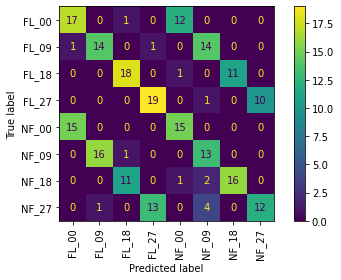

In [52]:
y_pred = classifier.predict(X_test_pca)
print(n_components, accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(
    classifier, X_test_pca, y_test, display_labels=target_names, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()